In [1]:
import xarray as xa
import cmocean

In [4]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import cartopy.feature as cfeature
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [38]:
xdf = xa.load_dataset('~/Downloads/masie_all_r00_4km.nc', mask_and_scale=True)
# xdf_loc = xa.load_dataset('~/Downloads/masie_lat_lon_4km.nc')

In [56]:
xdf.where('sea_ice_extent' == 3)

<xarray.Dataset>
Dimensions:              (time: 1, y: 6144, x: 6144)
Coordinates:
  * time                 (time) datetime64[ns] 2021-09-13
  * x                    (x) float64 -1.229e+07 -1.228e+07 ... 1.229e+07
    y                    (x) float64 -1.229e+07 -1.228e+07 ... 1.229e+07
Data variables:
    polar_stereographic  object nan
    sea_ice_extent       (time, y, x) float32 nan nan nan nan ... nan nan nan
Attributes: (12/52)
    Conventions:                CF-1.6, ACDD-1.3
    title:                      Multisensor Analyzed Sea Ice Extent - Norther...
    creator_name:               National Snow and Ice Data Center
    creator_email:              nsidc@nsidc.org
    creator_url:                https://nsidc.org/
    institution:                National Snow and Ice Data Center
    ...                         ...
    date_created:               2021-09-14T13:28:42Z
    history:                    14 September 2021 13:28Z: NetCDF file generat...
    time_coverage_start:        2021-09-13T00:00:00Z
    time_coverage_end:          2021-09-13T23:59:59Z
    geospatial_bounds_crs:      PROJCS["Stereographic_North_Pole",GEOGCS["WGS...
    geospatial_bounds:          POLYGON ((12288000.0000000000000000 -12288000...

In [5]:

def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(20.5, 5.25),
                           subplot_kw=dict(projection=projection))
    if projection == ccrs.PlateCarree():
        gl = ax.gridlines(draw_labels=True)
        gl.xlabels_top = gl.ylabels_right = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

#download land mask
# 50m is a good balance between dataset size and land feature resolution
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

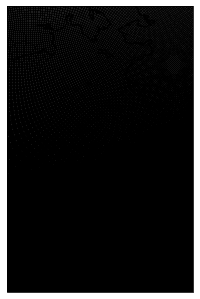

In [6]:
### Plot location of sample points for general BS region
extent = [-180, -155, 40, 67]
projection=ccrs.LambertConformal(central_longitude=200.0)
transformation=ccrs.PlateCarree()
fig,ax = make_map(projection=projection)

ax.plot(xdf_loc.longitude,xdf_loc.latitude,'k.',markersize=.25,transform=transformation)
ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
ax.set_extent(extent)

In [24]:
xdf_merged

<xarray.Dataset>
Dimensions:              (time: 1, x: 6144, y: 6144)
Coordinates:
  * time                 (time) datetime64[ns] 2021-09-13
  * x                    (x) float64 -1.229e+07 -1.228e+07 ... 1.229e+07
    y                    (x) float64 -1.229e+07 -1.228e+07 ... 1.229e+07
Data variables:
    polar_stereographic  |S1 b''
    sea_ice_extent       (time, y, x) float32 nan nan nan nan ... nan nan nan
    latitude             (y, x) float32 -21.48 -21.48 -21.47 ... -21.48 -21.48
    longitude            (y, x) float32 -125.0 -125.0 -125.0 ... 55.01 55.0
Attributes: (12/52)
    Conventions:                CF-1.6, ACDD-1.3
    title:                      Multisensor Analyzed Sea Ice Extent - Norther...
    creator_name:               National Snow and Ice Data Center
    creator_email:              nsidc@nsidc.org
    creator_url:                https://nsidc.org/
    institution:                National Snow and Ice Data Center
    ...                         ...
    date_created:               2021-09-14T13:28:42Z
    history:                    14 September 2021 13:28Z: NetCDF file generat...
    time_coverage_start:        2021-09-13T00:00:00Z
    time_coverage_end:          2021-09-13T23:59:59Z
    geospatial_bounds_crs:      PROJCS["Stereographic_North_Pole",GEOGCS["WGS...
    geospatial_bounds:          POLYGON ((12288000.0000000000000000 -12288000...